# The Stability Crisis: A Data-Driven Review of Employee Retention Failures

The goal of this Attrition Analysis is to move beyond simply reporting the overall employee departure rate and instead identify the specific drivers, high-risk employee segments, and critical instability points within the organization. By structuring the findings around core demographics, tenure, sentiment, and compensation, the analysis aims to reconcile seemingly contradictory data points—such as distinguishing between roles that contribute the highest volume of leavers (e.g., Data Scientists) and roles that pose the highest risk of departure (e.g., Sales Representatives). The ultimate objective is to provide data-driven, actionable recommendations for targeted interventions, particularly focused on stabilizing the organization's newest employees (who face an 80% attrition rate) and reducing volatility in key professional roles.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming the files are in the current working directory (Colab's file system)
df_descriptive = pd.read_csv('hr_data_descriptive (1).csv')
df_modeling = pd.read_csv('hr_data_modeling (2).csv')

# Display the first few rows and shapes to confirm the load
print("--- Descriptive Data ---")
print(f"Shape: {df_descriptive.shape}")
print(df_descriptive.head())

print("\n--- Modeling Data ---")
print(f"Shape: {df_modeling.shape}")
print(df_modeling.head())

--- Descriptive Data ---
Shape: (6899, 35)
  EmployeeID  Gender  Age Ethnicity Department          JobRole MaritalStatus  \
0  3012-1A41  Female   30     White      Sales  Sales Executive      Divorced   
1  3012-1A41  Female   30     White      Sales  Sales Executive      Divorced   
2  3012-1A41  Female   30     White      Sales  Sales Executive      Divorced   
3  3012-1A41  Female   30     White      Sales  Sales Executive      Divorced   
4  3012-1A41  Female   30     White      Sales  Sales Executive      Divorced   

  BusinessTravel    HireDate  Attrition  ...  ManagerRating  \
0    Some Travel  2012-01-03          0  ...            4.0   
1    Some Travel  2012-01-03          0  ...            3.0   
2    Some Travel  2012-01-03          0  ...            4.0   
3    Some Travel  2012-01-03          0  ...            3.0   
4    Some Travel  2012-01-03          0  ...            2.0   

     ManagerRating_Text  TrainingOpportunitiesWithinYear  \
0  Exceeds Expectation         

# **1. Core Demographics & Company Structure (Who is leaving?)**

/tmp/ipython-input-2550303679.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_dept.index, y=attrition_rate_by_dept.values, palette="viridis")


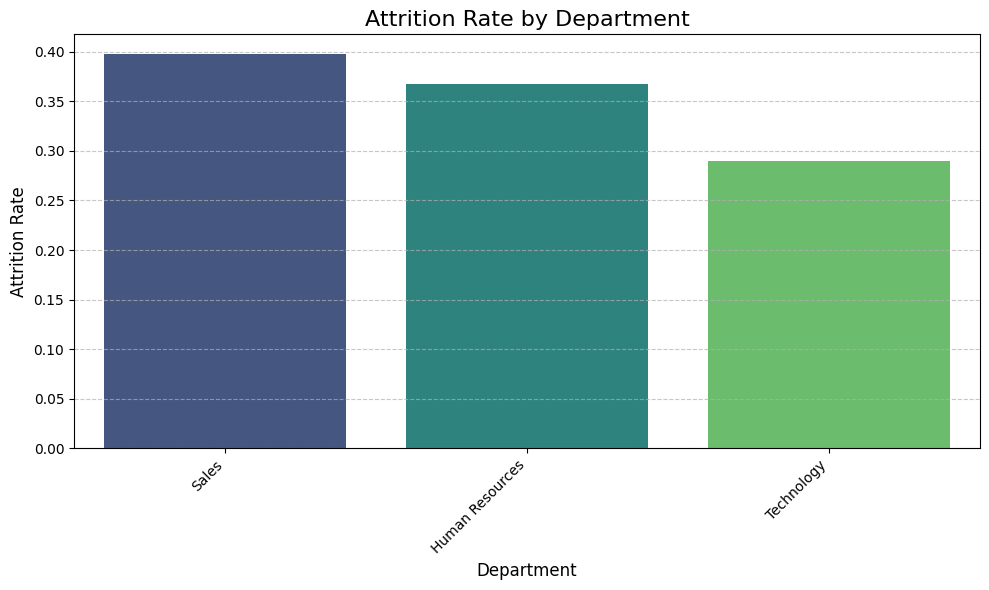

In [ ]:
# Assuming 'Attrition' is the target column (1 for leaving, 0 for staying)
# and 'Department' is the demographic feature you want to plot.

# 1. Calculate the Attrition Rate (Mean of Attrition for each Department)
attrition_rate_by_dept = df_modeling.groupby('Department')['Attrition'].mean().sort_values(ascending=False)

# 2. Create the Bar Chart using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_dept.index, y=attrition_rate_by_dept.values, palette="viridis")

# 3. Add labels and title for clarity
plt.title('Attrition Rate by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-898780120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_role.index, y=attrition_rate_by_role.values, palette="rocket")


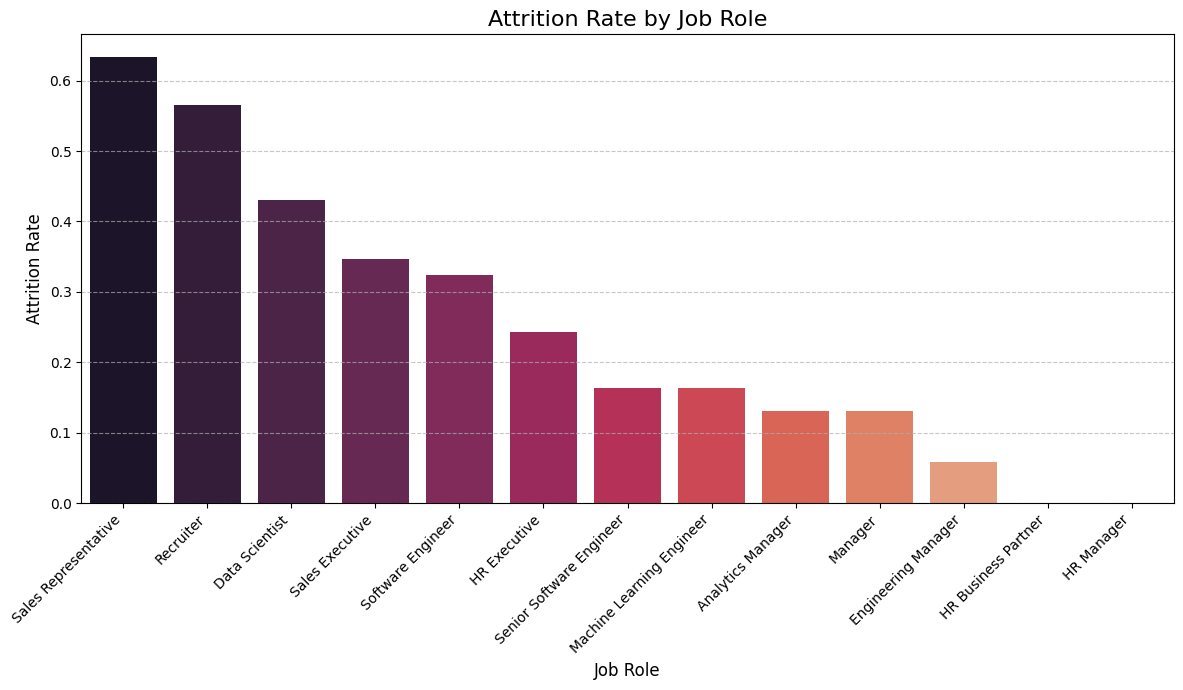

In [ ]:
# 1. Calculate the Attrition Rate (Mean of Attrition for each JobRole)
attrition_rate_by_role = df_modeling.groupby('JobRole')['Attrition'].mean().sort_values(ascending=False)

# 2. Create the Bar Chart using Seaborn and Matplotlib
plt.figure(figsize=(12, 7))
sns.barplot(x=attrition_rate_by_role.index, y=attrition_rate_by_role.values, palette="rocket")

# 3. Add labels and title for clarity
plt.title('Attrition Rate by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3341839076.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_education.index, y=attrition_rate_by_education.values, palette="cubehelix")


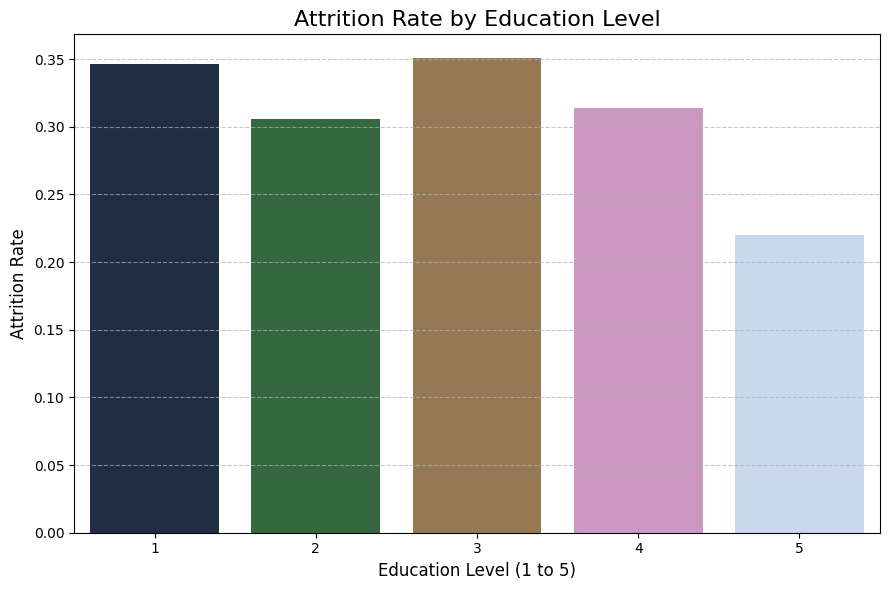

In [ ]:
# 1. Calculate the Attrition Rate (Mean of Attrition for each Education level)
attrition_rate_by_education = df_modeling.groupby('Education')['Attrition'].mean().sort_values(ascending=False)

# 2. Create the Bar Chart using Seaborn and Matplotlib
plt.figure(figsize=(9, 6))
sns.barplot(x=attrition_rate_by_education.index, y=attrition_rate_by_education.values, palette="cubehelix")

# 3. Add labels and title for clarity
plt.title('Attrition Rate by Education Level', fontsize=16)
plt.xlabel('Education Level (1 to 5)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-409221651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_marital.index, y=attrition_rate_by_marital.values, palette="Pastel1")


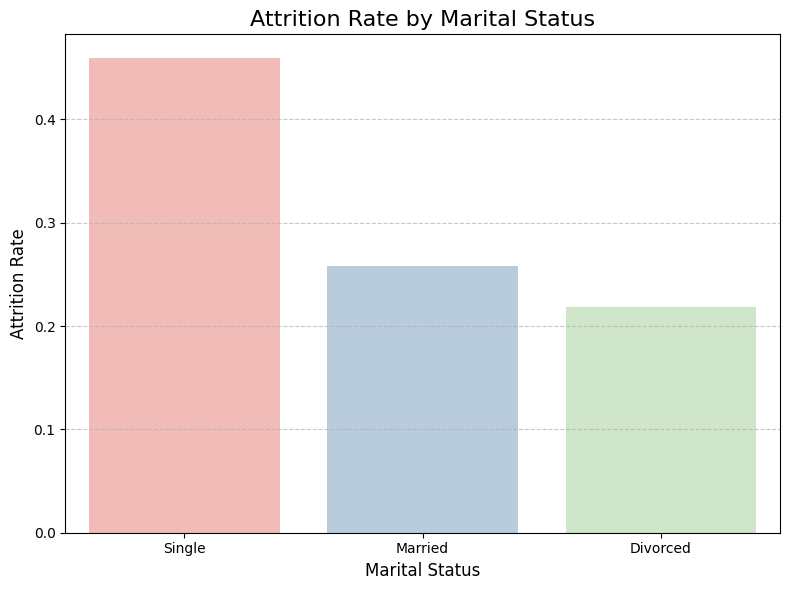

In [ ]:
# 1. Calculate the Attrition Rate (Mean of Attrition for each MaritalStatus)
attrition_rate_by_marital = df_modeling.groupby('MaritalStatus')['Attrition'].mean().sort_values(ascending=False)

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
# Using a clear color palette
sns.barplot(x=attrition_rate_by_marital.index, y=attrition_rate_by_marital.values, palette="Pastel1")

# 3. Add labels and title
plt.title('Attrition Rate by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **2. Tenure & Career Stability (When are they leaving?)**

/tmp/ipython-input-3221957422.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_tenure.index, y=attrition_rate_by_tenure.values, palette="mako")


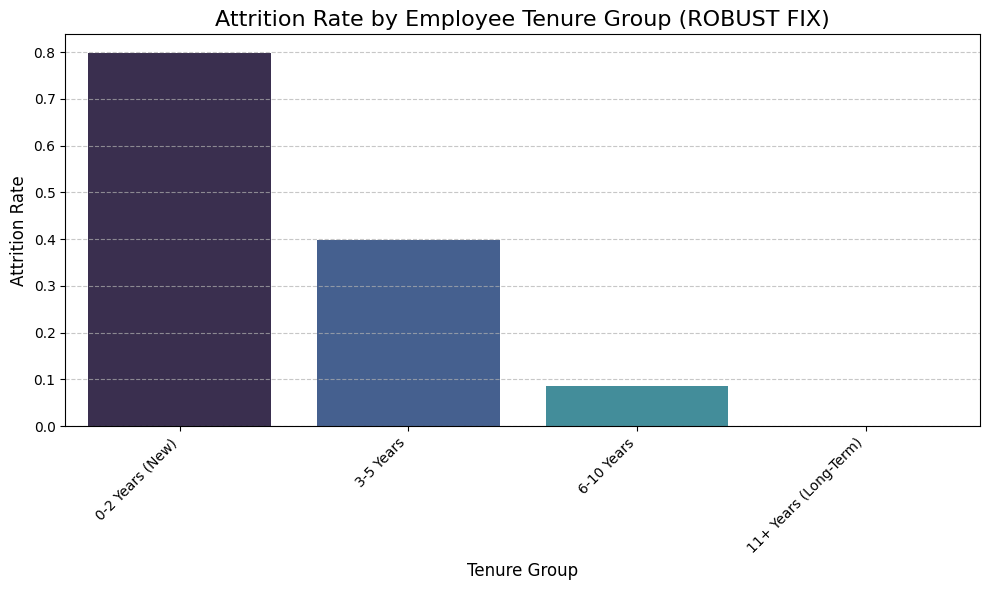

In [ ]:
# 1. Define tenure bins and labels with a robust final edge (50)
# This ensures the bin edges are always unique, fixing the initial ValueError.
bins = [0, 3, 6, 11, 50] # Explicitly setting a safe upper bound
labels = ['0-2 Years (New)', '3-5 Years', '6-10 Years', '11+ Years (Long-Term)']

# 2. Create the categorical Tenure_Group column by binning
df_modeling['Tenure_Group'] = pd.cut(
    df_modeling['YearsAtCompany'],
    bins=bins,
    labels=labels,
    right=False,  # Intervals will be [inclusive, exclusive)
    include_lowest=True
)

# 3. Calculate the Attrition Rate for each Tenure Group
attrition_rate_by_tenure = df_modeling.groupby('Tenure_Group', observed=True)['Attrition'].mean().sort_values(ascending=False)

# 4. Create the Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_tenure.index, y=attrition_rate_by_tenure.values, palette="mako")

# 5. Add labels and title
plt.title('Attrition Rate by Employee Tenure Group (ROBUST FIX)', fontsize=16)
plt.xlabel('Tenure Group', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

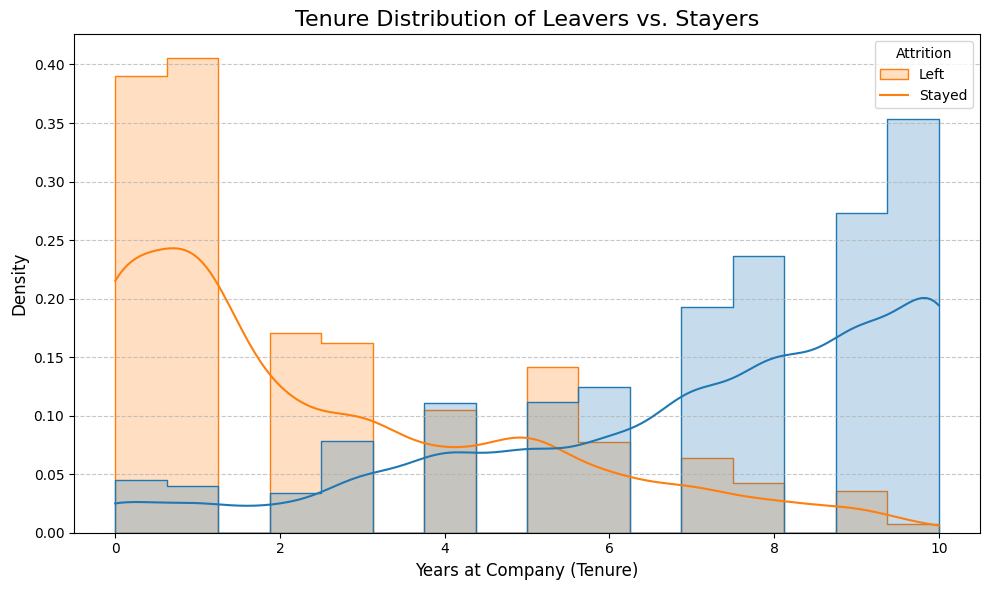

In [ ]:
# Make Attrition column categorical for clearer plot labels
df_modeling['Attrition_Status'] = df_modeling['Attrition'].map({0: 'Stayed', 1: 'Left'})

# 1. Create the figure
plt.figure(figsize=(10, 6))

# 2. Use a histogram with a KDE curve to compare the distributions
# element="step" helps visualize the counts clearly when hue is used.
sns.histplot(
    data=df_modeling,
    x='YearsAtCompany',
    hue='Attrition_Status',
    kde=True,
    palette=['#1f77b4', '#ff7f0e'], # Blue for stayed, Orange for left
    element="step",
    stat="density", # Normalize to show distribution shape
    common_norm=False # Normalize each group independently
)

# 3. Add labels and title
plt.title('Tenure Distribution of Leavers vs. Stayers', fontsize=16)
plt.xlabel('Years at Company (Tenure)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Attrition', labels=['Left', 'Stayed']) # Manually set legend order
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

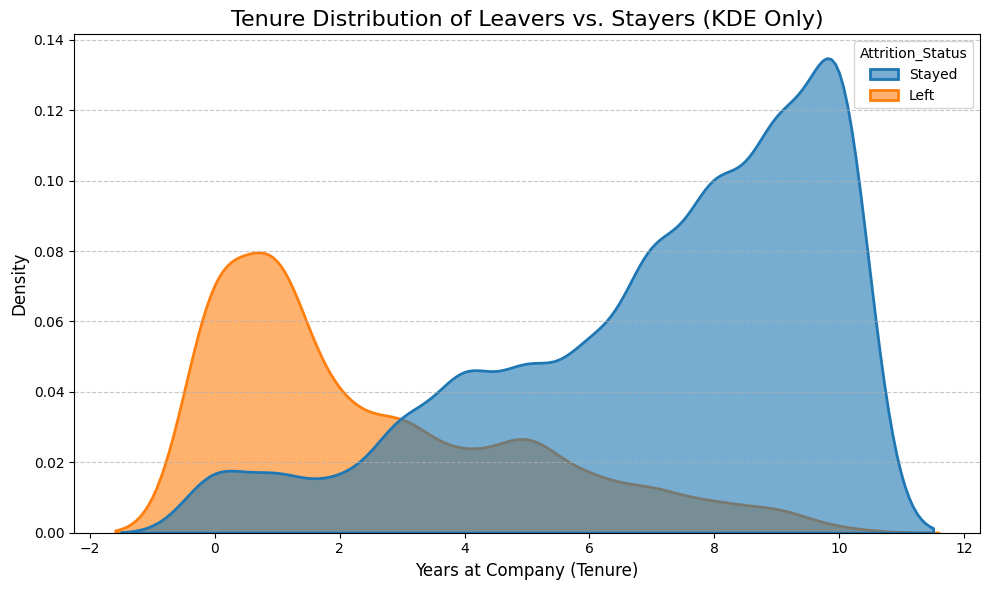

In [ ]:
# Ensure Attrition column is ready for the legend
df_modeling['Attrition_Status'] = df_modeling['Attrition'].map({0: 'Stayed', 1: 'Left'})

# 1. Create the figure
plt.figure(figsize=(10, 6))

# 2. Use a KDE plot (density plot) for a clearer, smoother comparison
sns.kdeplot(
    data=df_modeling,
    x='YearsAtCompany',
    hue='Attrition_Status',
    fill=True, # Fill the area under the curve for better visual distinction
    alpha=0.6, # Make it slightly transparent where curves overlap
    linewidth=2,
    palette=['#1f77b4', '#ff7f0e'] # Blue for stayed, Orange for left
)

# 3. Add labels and title
plt.title('Tenure Distribution of Leavers vs. Stayers (KDE Only)', fontsize=16)
plt.xlabel('Years at Company (Tenure)', fontsize=12)
plt.ylabel('Density', fontsize=12)
# The legend will be automatically generated by Seaborn and will be clear
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2987693085.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_mgr_tenure.index, y=attrition_rate_by_mgr_tenure.values, palette="cubehelix")


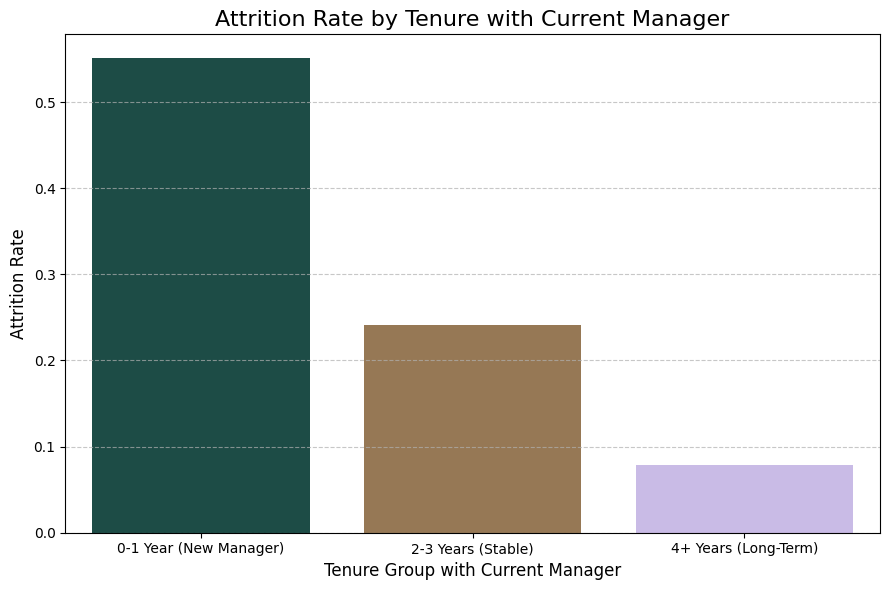

In [ ]:
# 1. Define bins and labels for Years With Current Manager
max_manager_years = df_modeling['YearsWithCurrManager'].max()
bins = [-1, 1, 3, max_manager_years + 1] # -1 ensures 0 is included
labels = ['0-1 Year (New Manager)', '2-3 Years (Stable)', '4+ Years (Long-Term)']

# 2. Create the categorical 'Manager_Tenure_Group' column
df_modeling['Manager_Tenure_Group'] = pd.cut(
    df_modeling['YearsWithCurrManager'],
    bins=bins,
    labels=labels,
    right=True, # Intervals will be (exclusive, inclusive]
    include_lowest=True
)

# 3. Calculate Attrition Rate for each Tenure Group
attrition_rate_by_mgr_tenure = df_modeling.groupby('Manager_Tenure_Group', observed=True)['Attrition'].mean().sort_values(ascending=False)

# 4. Create the Bar Chart
plt.figure(figsize=(9, 6))
sns.barplot(x=attrition_rate_by_mgr_tenure.index, y=attrition_rate_by_mgr_tenure.values, palette="cubehelix")

# 5. Add labels and title
plt.title('Attrition Rate by Tenure with Current Manager', fontsize=16)
plt.xlabel('Tenure Group with Current Manager', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4084846678.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_promo.index, y=attrition_rate_by_promo.values, palette="YlOrRd")


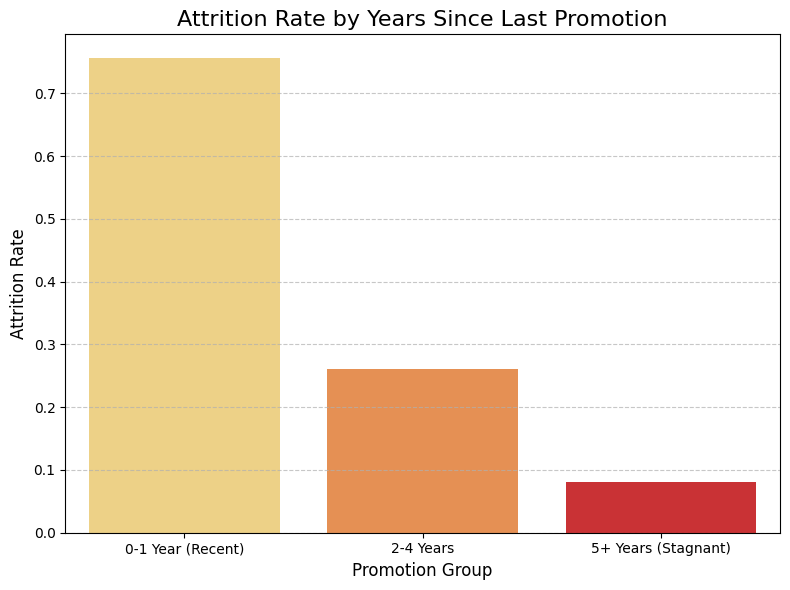

In [ ]:
# 1. Define bins and labels for Years Since Last Promotion
# Use a dynamic max value to ensure all data is captured
max_promo_years = df_modeling['YearsSinceLastPromotion'].max()
bins = [-1, 1, 4, max_promo_years + 1] # -1 ensures 0 is included in the first bin
labels = ['0-1 Year (Recent)', '2-4 Years', '5+ Years (Stagnant)']

# 2. Create the categorical 'Promo_Group' column
df_modeling['Promo_Group'] = pd.cut(
    df_modeling['YearsSinceLastPromotion'],
    bins=bins,
    labels=labels,
    right=True, # Intervals will be (exclusive, inclusive]
    include_lowest=True
)

# 3. Calculate Attrition Rate for each Promotion Group
attrition_rate_by_promo = df_modeling.groupby('Promo_Group', observed=True)['Attrition'].mean().sort_values(ascending=False)

# 4. Create the Bar Chart
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_rate_by_promo.index, y=attrition_rate_by_promo.values, palette="YlOrRd")

# 5. Add labels and title
plt.title('Attrition Rate by Years Since Last Promotion', fontsize=16)
plt.xlabel('Promotion Group', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print(df_modeling.columns.tolist())

['EmployeeID', 'Gender', 'Age', 'Ethnicity', 'Department', 'JobRole', 'MaritalStatus', 'BusinessTravel', 'Attrition', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime', 'StockOptionLevel', 'Salary', 'DistanceFromHome (KM)', 'State', 'Education', 'EducationField', 'SelfRating', 'ManagerRating', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'Tenure_Group', 'Attrition_Status']


# **3. Employee Sentiment & Environment (Why are they leaving? - Non-Compensation)**

/tmp/ipython-input-1820702130.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_js.index, y=attrition_rate_by_js.values, palette="crest_r")


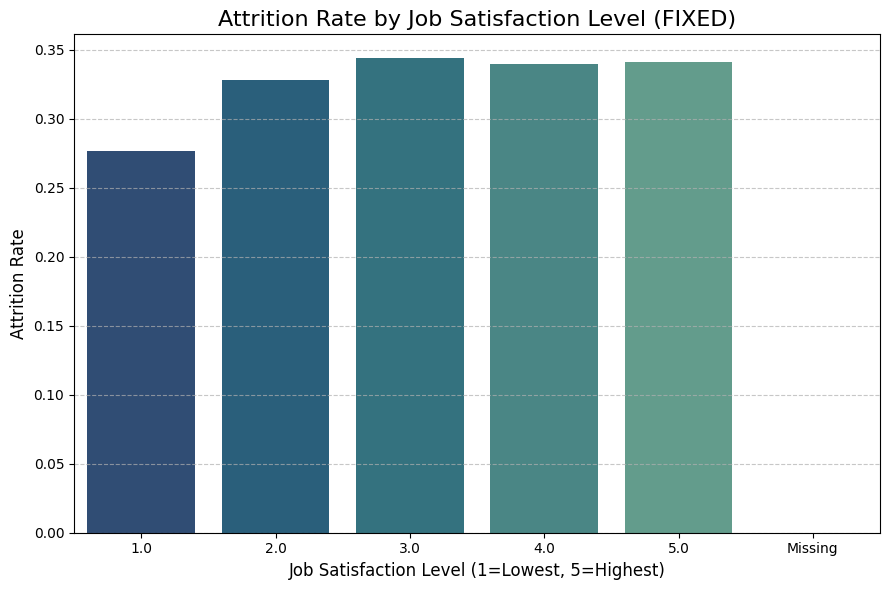

In [ ]:
# 1. Prepare Data: Define JobSatisfaction as an ORDERED CATEGORICAL column
# This is the robust way to ensure the bars always appear in the 1 to 5 order.
# Fill NaN values with a placeholder category 'Missing' if they exist
df_modeling['JobSatisfaction_Clean'] = df_modeling['JobSatisfaction'].fillna('Missing').astype(str)

# Define the explicit order for the bars (levels 1.0 to 5.0, and 'Missing' if applicable)
# We use a list of strings '1.0', '2.0', etc., based on how .astype(str) converts floats.
ordered_levels = sorted([s for s in df_modeling['JobSatisfaction_Clean'].unique() if s != 'Missing' and s != 'nan'], key=lambda x: float(x))
if 'Missing' in df_modeling['JobSatisfaction_Clean'].unique():
    ordered_levels.append('Missing')

# 2. Calculate Attrition Rate using the cleaned, ordered column
attrition_rate_by_js = df_modeling.groupby('JobSatisfaction_Clean')['Attrition'].mean().reindex(ordered_levels)

# 3. Create the Bar Chart
plt.figure(figsize=(9, 6))
# Using the ordered index for the x-axis
sns.barplot(x=attrition_rate_by_js.index, y=attrition_rate_by_js.values, palette="crest_r")

# 4. Add labels and title
plt.title('Attrition Rate by Job Satisfaction Level (FIXED)', fontsize=16)
plt.xlabel('Job Satisfaction Level (1=Lowest, 5=Highest)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

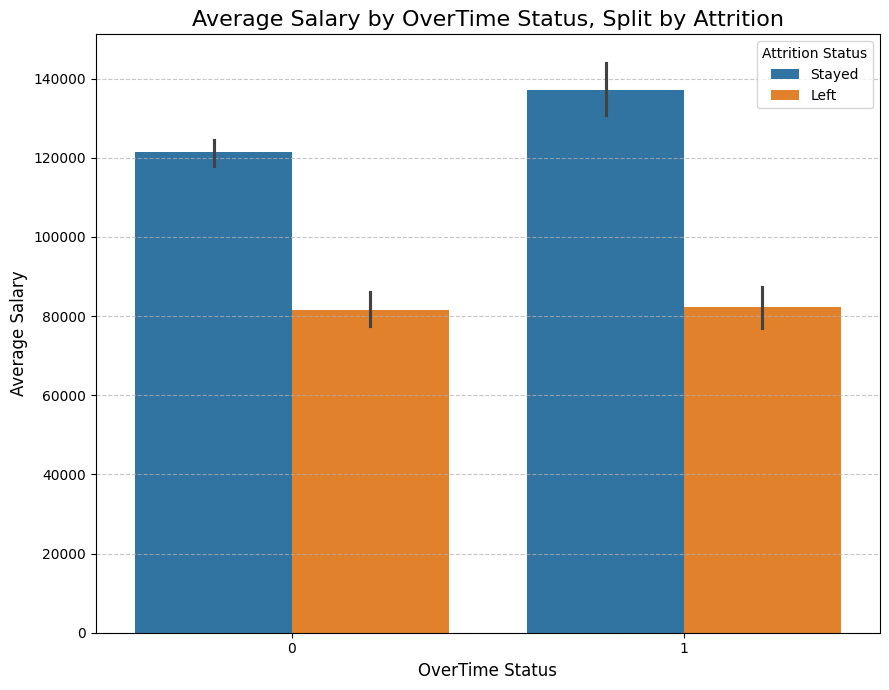

In [ ]:
# Ensure 'Attrition_Status' is defined for the hue
if 'Attrition_Status' not in df_modeling.columns:
    df_modeling['Attrition_Status'] = df_modeling['Attrition'].map({0: 'Stayed', 1: 'Left'})

# 1. Create the figure
plt.figure(figsize=(9, 7))

# 2. Create the Grouped Bar Chart
# Shows the AVERAGE Salary (Y-axis) for each OverTime group (X-axis), split by Attrition (Hue).
sns.barplot(
    data=df_modeling,
    x='OverTime',
    y='Salary',
    hue='Attrition_Status',
    palette=['#1f77b4', '#ff7f0e'] # Blue for stayed, Orange for left
)

# 3. Add labels and title
plt.title('Average Salary by OverTime Status, Split by Attrition', fontsize=16)
plt.xlabel('OverTime Status', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.legend(title='Attrition Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

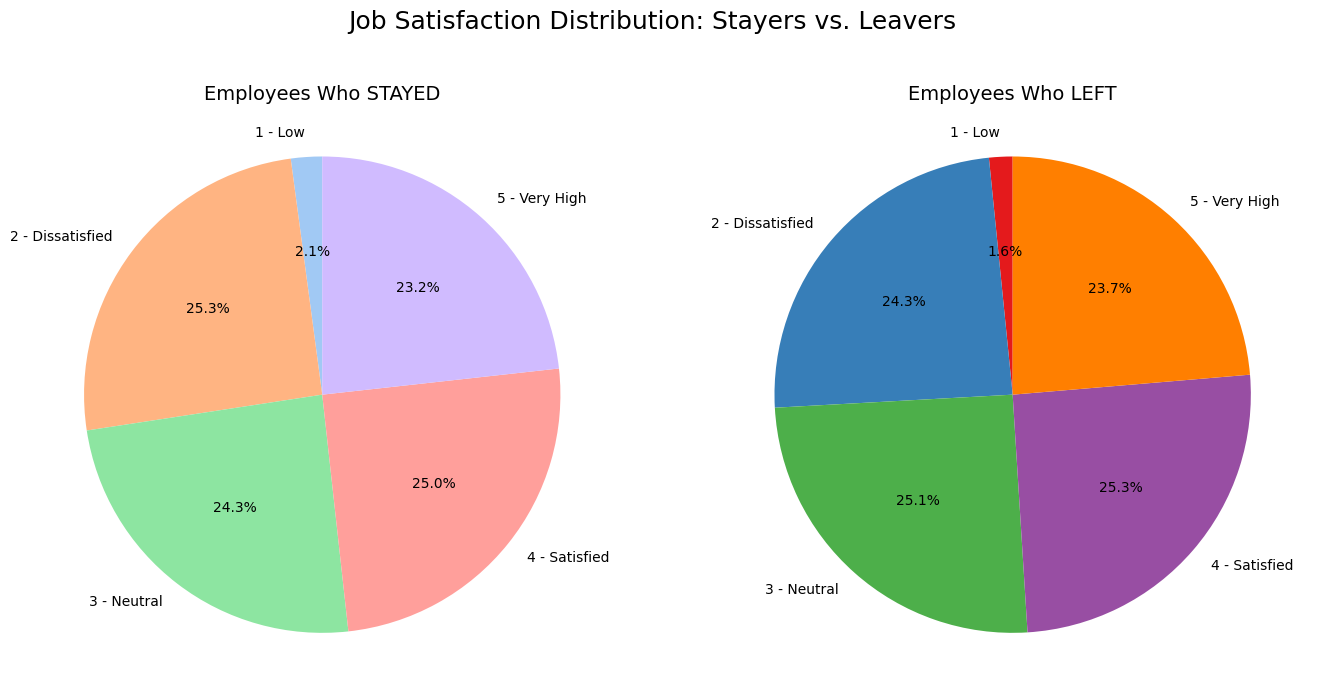

In [ ]:
# Assuming df_modeling is loaded
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare Data: Map satisfaction levels to descriptive labels for clarity
satisfaction_labels = {
    1.0: '1 - Low',
    2.0: '2 - Dissatisfied',
    3.0: '3 - Neutral',
    4.0: '4 - Satisfied',
    5.0: '5 - Very High'
}
df_modeling['JobSatisfaction_Label'] = df_modeling['JobSatisfaction'].map(satisfaction_labels)

# Filter Data
df_stayed = df_modeling[df_modeling['Attrition'] == 0]
df_left = df_modeling[df_modeling['Attrition'] == 1]

# Calculate Counts
# Sort the index based on the original numeric satisfaction level
stayed_counts = df_stayed['JobSatisfaction_Label'].value_counts().sort_index(key=lambda x: x.str[0].astype(float))
left_counts = df_left['JobSatisfaction_Label'].value_counts().sort_index(key=lambda x: x.str[0].astype(float))


# 2. Create the Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Job Satisfaction Distribution: Stayers vs. Leavers', fontsize=18)

# --- Pie Chart for Stayers (Attrition = 0) ---
axes[0].pie(
    stayed_counts.values,
    labels=stayed_counts.index,
    autopct='%1.1f%%',        # Show percentage on slices
    startangle=90,
    colors=sns.color_palette("pastel")
)
axes[0].set_title('Employees Who STAYED', fontsize=14)
axes[0].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.


# --- Pie Chart for Leavers (Attrition = 1) ---
axes[1].pie(
    left_counts.values,
    labels=left_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set1")
)
axes[1].set_title('Employees Who LEFT', fontsize=14)
axes[1].axis('equal')


plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

/tmp/ipython-input-16954427.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_wlb.index, y=attrition_rate_by_wlb.values, palette="rocket_r")


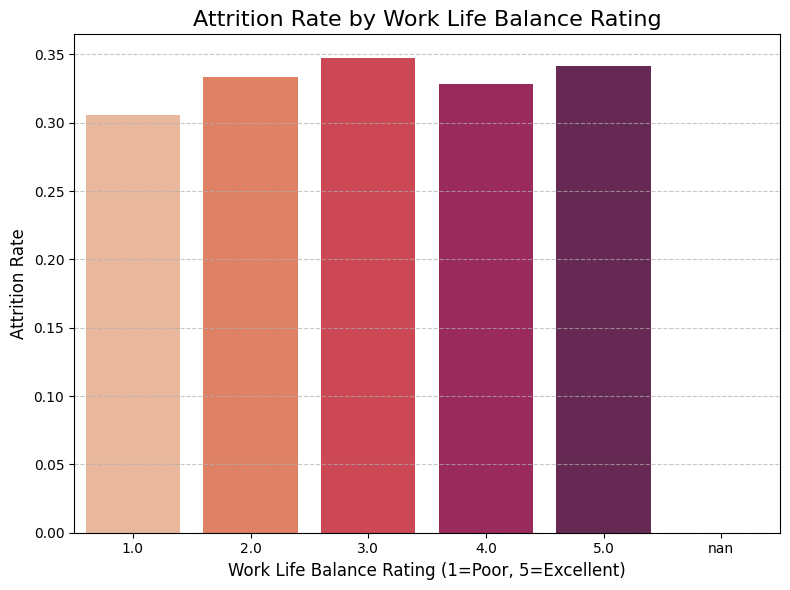

In [ ]:
# 1. Prepare Data: Ensure WorkLifeBalance is treated as a string category and ordered
df_modeling['WLB_Str'] = df_modeling['WorkLifeBalance'].astype(str)

# Calculate Attrition Rate by Work Life Balance
attrition_rate_by_wlb = df_modeling.groupby('WLB_Str')['Attrition'].mean()

# Reindex to ensure the bars are ordered correctly (e.g., '1.0', '2.0', ...)
ordered_levels = sorted([s for s in attrition_rate_by_wlb.index.unique()], key=lambda x: float(x))
attrition_rate_by_wlb = attrition_rate_by_wlb.reindex(ordered_levels)

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
# Using a reverse color map to emphasize high attrition in lower WLB ratings
sns.barplot(x=attrition_rate_by_wlb.index, y=attrition_rate_by_wlb.values, palette="rocket_r")

# 3. Add labels and title
plt.title('Attrition Rate by Work Life Balance Rating', fontsize=16)
plt.xlabel('Work Life Balance Rating (1=Poor, 5=Excellent)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4170729737.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_envsat.index, y=attrition_rate_by_envsat.values, palette="Greens_r")


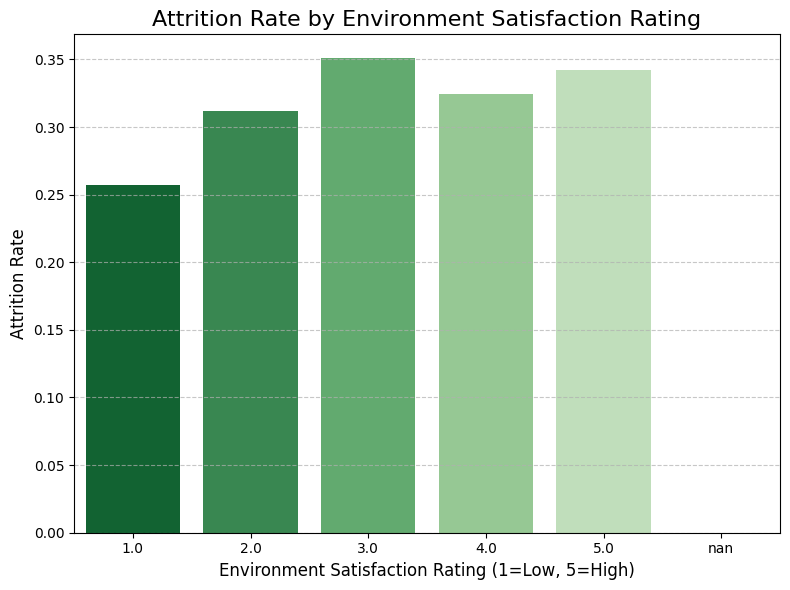

In [ ]:
# 1. Prepare Data: Ensure EnvironmentSatisfaction is treated as a string category and ordered
df_modeling['EnvSat_Str'] = df_modeling['EnvironmentSatisfaction'].astype(str)

# Calculate Attrition Rate by Environment Satisfaction
attrition_rate_by_envsat = df_modeling.groupby('EnvSat_Str')['Attrition'].mean()

# Reindex to ensure the bars are ordered correctly (e.g., '1.0', '2.0', ...)
ordered_levels = sorted([s for s in attrition_rate_by_envsat.index.unique()], key=lambda x: float(x))
attrition_rate_by_envsat = attrition_rate_by_envsat.reindex(ordered_levels)

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
# Using a reverse color map to emphasize high attrition in lower ratings
sns.barplot(x=attrition_rate_by_envsat.index, y=attrition_rate_by_envsat.values, palette="Greens_r")

# 3. Add labels and title
plt.title('Attrition Rate by Environment Satisfaction Rating', fontsize=16)
plt.xlabel('Environment Satisfaction Rating (1=Low, 5=High)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3970251696.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_relsat.index, y=attrition_rate_by_relsat.values, palette="mako_r")


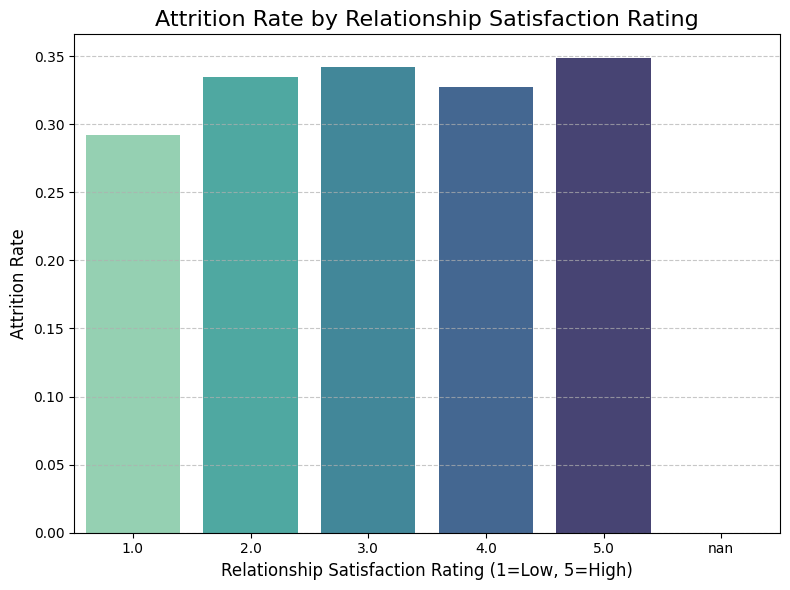

In [ ]:
# 1. Prepare Data: Ensure RelationshipSatisfaction is treated as a string category and ordered
df_modeling['RelSat_Str'] = df_modeling['RelationshipSatisfaction'].astype(str)

# Calculate Attrition Rate by Relationship Satisfaction
attrition_rate_by_relsat = df_modeling.groupby('RelSat_Str')['Attrition'].mean()

# Reindex to ensure the bars are ordered correctly (e.g., '1.0', '2.0', ...)
ordered_levels = sorted([s for s in attrition_rate_by_relsat.index.unique()], key=lambda x: float(x))
attrition_rate_by_relsat = attrition_rate_by_relsat.reindex(ordered_levels)

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
# Using a color map that reverses the color for high attrition (low satisfaction)
sns.barplot(x=attrition_rate_by_relsat.index, y=attrition_rate_by_relsat.values, palette="mako_r")

# 3. Add labels and title
plt.title('Attrition Rate by Relationship Satisfaction Rating', fontsize=16)
plt.xlabel('Relationship Satisfaction Rating (1=Low, 5=High)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **4. Work Conditions & Compensation Drivers (The Trade-Offs)**

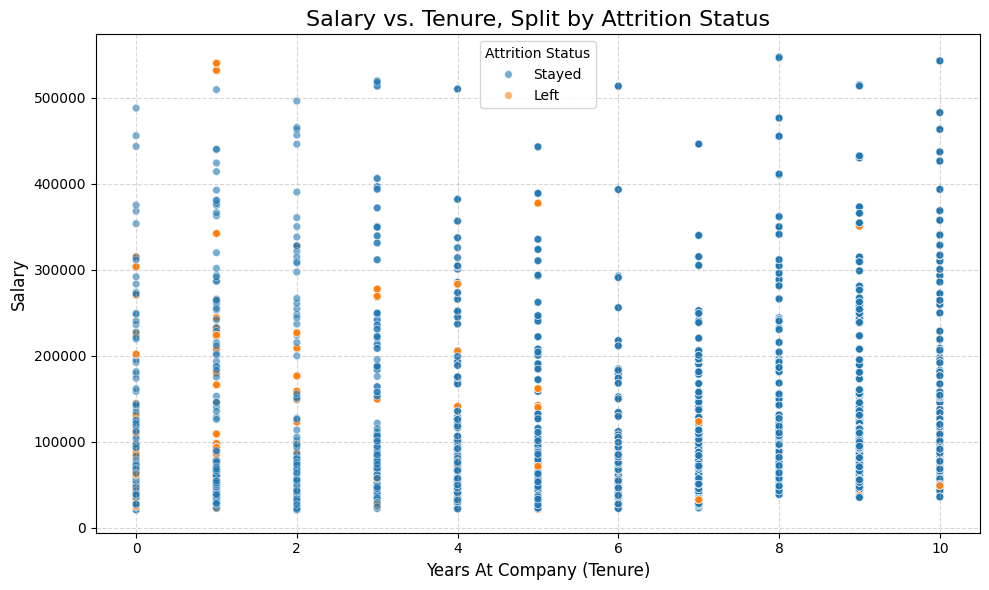

In [ ]:
# Ensure 'Attrition_Status' is defined for the hue
if 'Attrition_Status' not in df_modeling.columns:
    df_modeling['Attrition_Status'] = df_modeling['Attrition'].map({0: 'Stayed', 1: 'Left'})

# 1. Create the figure
plt.figure(figsize=(10, 6))

# 2. Create the Scatter Plot
# X = Years at Company (Tenure), Y = Salary, Hue = Attrition Status
sns.scatterplot(
    data=df_modeling,
    x='YearsAtCompany',
    y='Salary',
    hue='Attrition_Status',
    palette=['#1f77b4', '#ff7f0e'], # Blue for stayed, Orange for left
    s=30, # Size of dots
    alpha=0.6 # Transparency to see density
)

# 3. Add labels and title
plt.title('Salary vs. Tenure, Split by Attrition Status', fontsize=16)
plt.xlabel('Years At Company (Tenure)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(title='Attrition Status')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2471468943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_travel.index, y=attrition_rate_by_travel.values, palette="Set2")


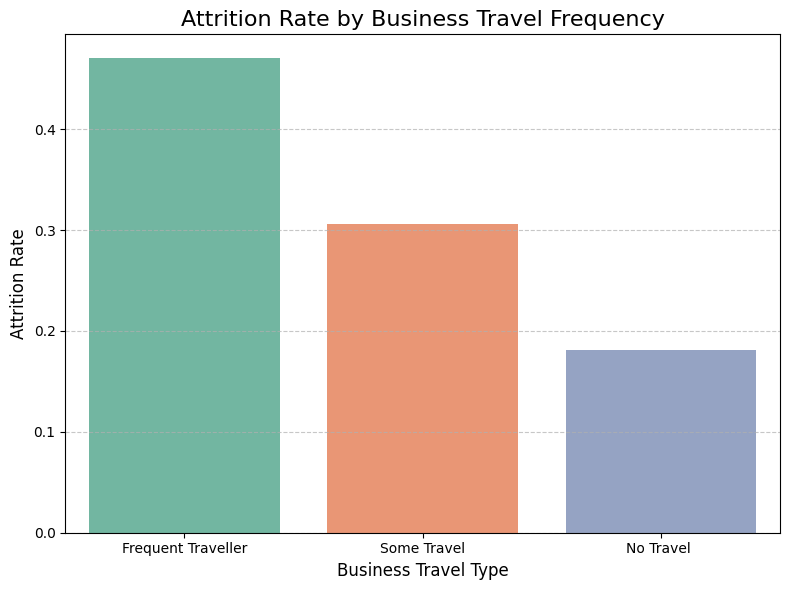

In [ ]:
# 1. Calculate the Attrition Rate (Mean of Attrition for each BusinessTravel type)
attrition_rate_by_travel = df_modeling.groupby('BusinessTravel')['Attrition'].mean().sort_values(ascending=False)

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
# Using a clear color palette
sns.barplot(x=attrition_rate_by_travel.index, y=attrition_rate_by_travel.values, palette="Set2")

# 3. Add labels and title
plt.title('Attrition Rate by Business Travel Frequency', fontsize=16)
plt.xlabel('Business Travel Type', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

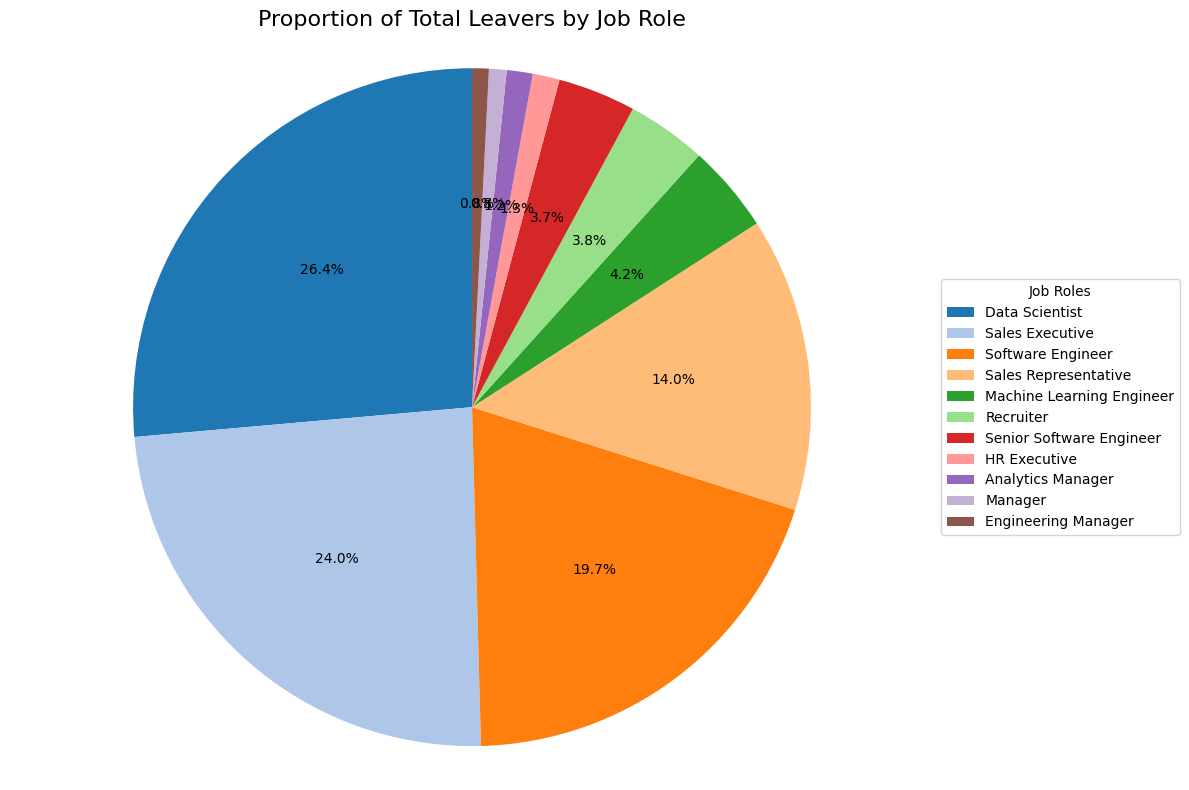

In [ ]:
# 1. Filter the data to include ONLY leavers (Attrition = 1)
df_leavers = df_modeling[df_modeling['Attrition'] == 1]

# 2. Calculate the count of leavers for each JobRole
leavers_by_role = df_leavers['JobRole'].value_counts()

# 3. Create the Pie Chart (Wider figure for the external legend)
plt.figure(figsize=(12, 8))

# Use plt.pie, but DO NOT pass the labels argument. Capture wedges for the legend.
wedges, texts, autotexts = plt.pie(
    leavers_by_role.values,
    autopct='%1.1f%%',      # Show percentage on slices
    startangle=90,
    colors=sns.color_palette('tab20')
)

# 4. Add the Job Roles as a separate, readable legend (THE FIX)
plt.legend(
    wedges,
    leavers_by_role.index, # Use the JobRole names for the legend
    title="Job Roles",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1) # Place legend outside the chart area
)

# 5. Add title
plt.title('Proportion of Total Leavers by Job Role', fontsize=16)
plt.axis('equal') # Ensure the pie is a circle
plt.tight_layout()
plt.show()

/tmp/ipython-input-4120839592.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_mgrrat.index, y=attrition_rate_by_mgrrat.values, palette="Reds_r")


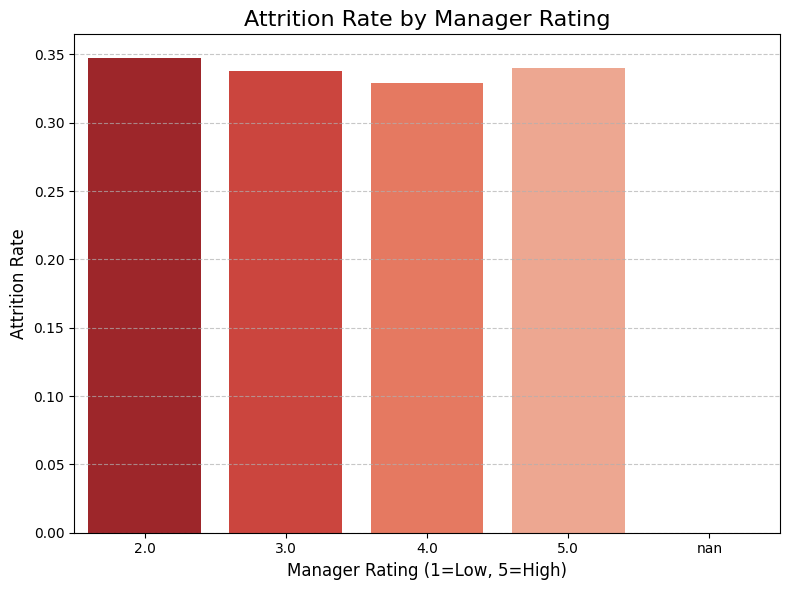

In [ ]:
# 1. Prepare Data: Ensure ManagerRating is treated as a string category and ordered
df_modeling['MgrRat_Str'] = df_modeling['ManagerRating'].astype(str)

# Calculate Attrition Rate by Manager Rating
attrition_rate_by_mgrrat = df_modeling.groupby('MgrRat_Str')['Attrition'].mean()

# Reindex to ensure the bars are ordered correctly (e.g., '1.0', '2.0', ...)
ordered_levels = sorted([s for s in attrition_rate_by_mgrrat.index.unique()], key=lambda x: float(x))
attrition_rate_by_mgrrat = attrition_rate_by_mgrrat.reindex(ordered_levels)

# 2. Create the Bar Chart
plt.figure(figsize=(8, 6))
# Using a reverse color map to emphasize high attrition in lower ratings
sns.barplot(x=attrition_rate_by_mgrrat.index, y=attrition_rate_by_mgrrat.values, palette="Reds_r")

# 3. Add labels and title
plt.title('Attrition Rate by Manager Rating', fontsize=16)
plt.xlabel('Manager Rating (1=Low, 5=High)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3424646595.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate_by_commute.index, y=attrition_rate_by_commute.values, palette="Oranges_d")


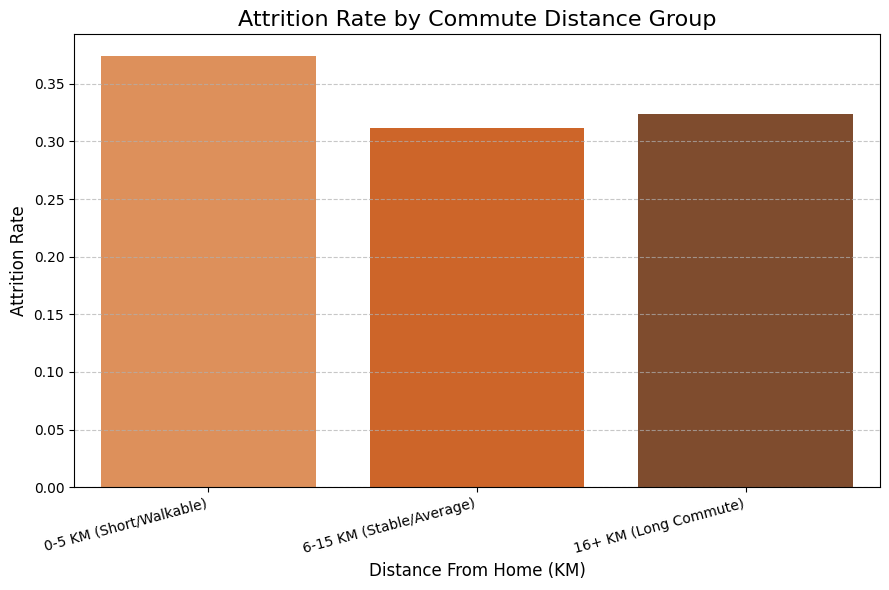

In [ ]:
# 1. Define bins and labels for Distance From Home (KM)
max_distance = df_modeling['DistanceFromHome (KM)'].max()
bins = [-1, 5, 15, max_distance + 1] # -1 ensures 0 is included
labels = ['0-5 KM (Short/Walkable)', '6-15 KM (Stable/Average)', '16+ KM (Long Commute)']

# 2. Create the categorical 'Commute_Group' column
df_modeling['Commute_Group'] = pd.cut(
    df_modeling['DistanceFromHome (KM)'],
    bins=bins,
    labels=labels,
    right=True, # Intervals will be (exclusive, inclusive]
    include_lowest=True
)

# 3. Calculate Attrition Rate for each Commute Group
attrition_rate_by_commute = df_modeling.groupby('Commute_Group', observed=True)['Attrition'].mean().sort_values(ascending=False)

# 4. Create the Bar Chart
plt.figure(figsize=(9, 6))
sns.barplot(x=attrition_rate_by_commute.index, y=attrition_rate_by_commute.values, palette="Oranges_d")

# 5. Add labels and title
plt.title('Attrition Rate by Commute Distance Group', fontsize=16)
plt.xlabel('Distance From Home (KM)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

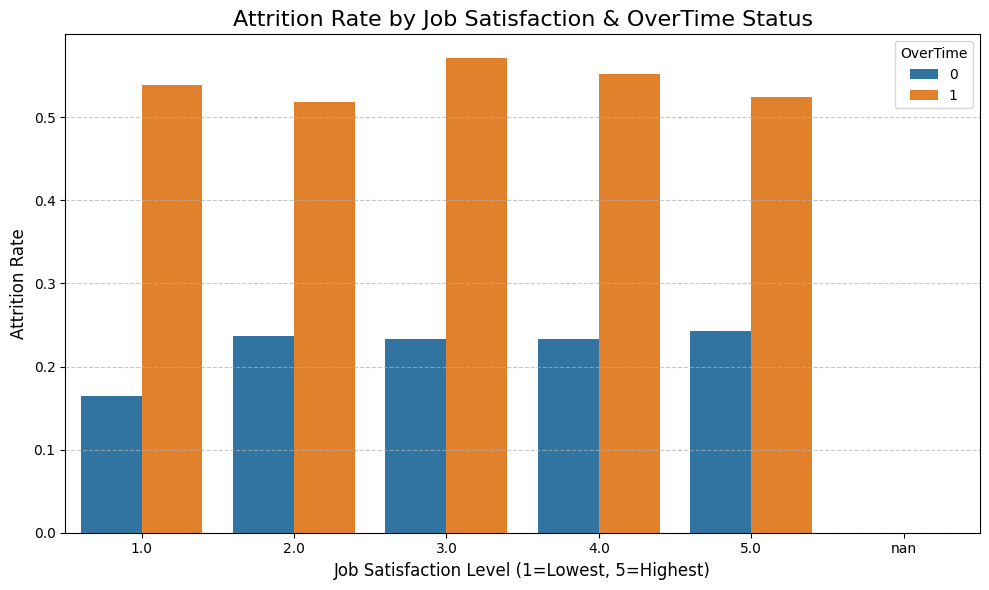

In [ ]:
# 1. Prepare Data: Ensure JobSatisfaction is treated as a string category and ordered
df_modeling['JobSatisfaction_Str'] = df_modeling['JobSatisfaction'].astype(str)

# Calculate Attrition Rate for each combination
attrition_rate_combo = df_modeling.groupby(['JobSatisfaction_Str', 'OverTime'])['Attrition'].mean().reset_index()

# Define the order for the X-axis (Satisfaction Levels)
ordered_levels = sorted([s for s in attrition_rate_combo['JobSatisfaction_Str'].unique()], key=lambda x: float(x))


# 2. Create the Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=attrition_rate_combo,
    x='JobSatisfaction_Str',
    y='Attrition',
    hue='OverTime',
    order=ordered_levels,
    palette=['#1f77b4', '#ff7f0e'] # Blue for No OverTime, Orange for Yes OverTime
)

# 3. Add labels and title
plt.title('Attrition Rate by Job Satisfaction & OverTime Status', fontsize=16)
plt.xlabel('Job Satisfaction Level (1=Lowest, 5=Highest)', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.legend(title='OverTime', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

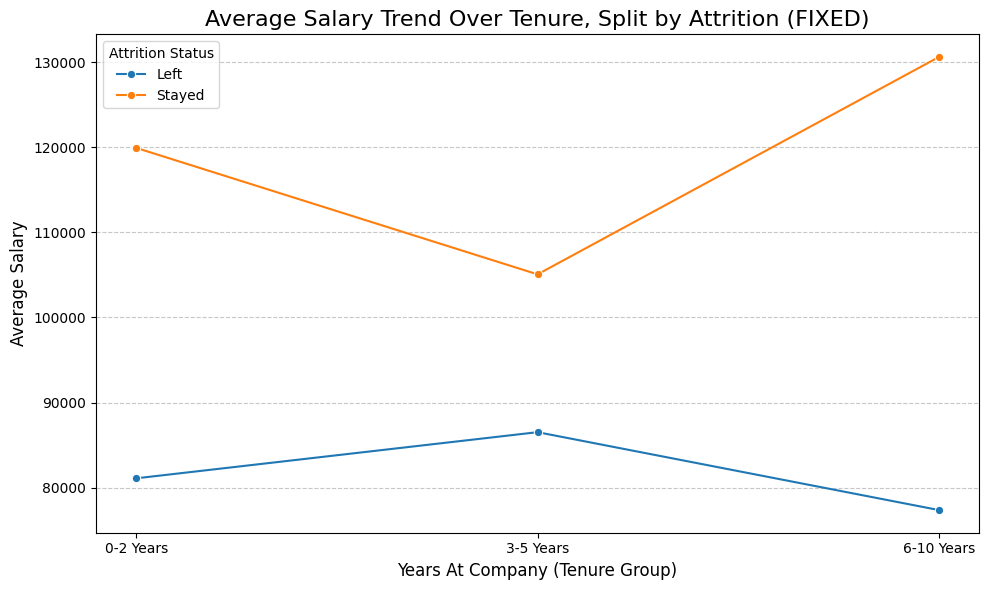

In [ ]:
# Assuming df_modeling is loaded
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare Data: Bin YearsAtCompany (Tenure)
# FIX: Use a safe, high static number (50) for the last bin edge.
bins = [0, 3, 6, 11, 50]
labels = ['0-2 Years', '3-5 Years', '6-10 Years', '11+ Years']

df_modeling['Tenure_Group'] = pd.cut(
    df_modeling['YearsAtCompany'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True # Removed duplicates='drop' as the bin edges are now guaranteed unique
)

# Ensure 'Attrition_Status' is defined
if 'Attrition_Status' not in df_modeling.columns:
    df_modeling['Attrition_Status'] = df_modeling['Attrition'].map({0: 'Stayed', 1: 'Left'})

# 2. Calculate the Average Salary for each Tenure Group, split by Attrition
avg_salary_by_tenure = df_modeling.groupby(['Tenure_Group', 'Attrition_Status'], observed=True)['Salary'].mean().reset_index()

# 3. Create the Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=avg_salary_by_tenure,
    x='Tenure_Group',
    y='Salary',
    hue='Attrition_Status',
    marker='o',
    palette=['#1f77b4', '#ff7f0e'],
    errorbar=None
)

# 4. Add labels and title
plt.title('Average Salary Trend Over Tenure, Split by Attrition (FIXED)', fontsize=16)
plt.xlabel('Years At Company (Tenure Group)', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.legend(title='Attrition Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

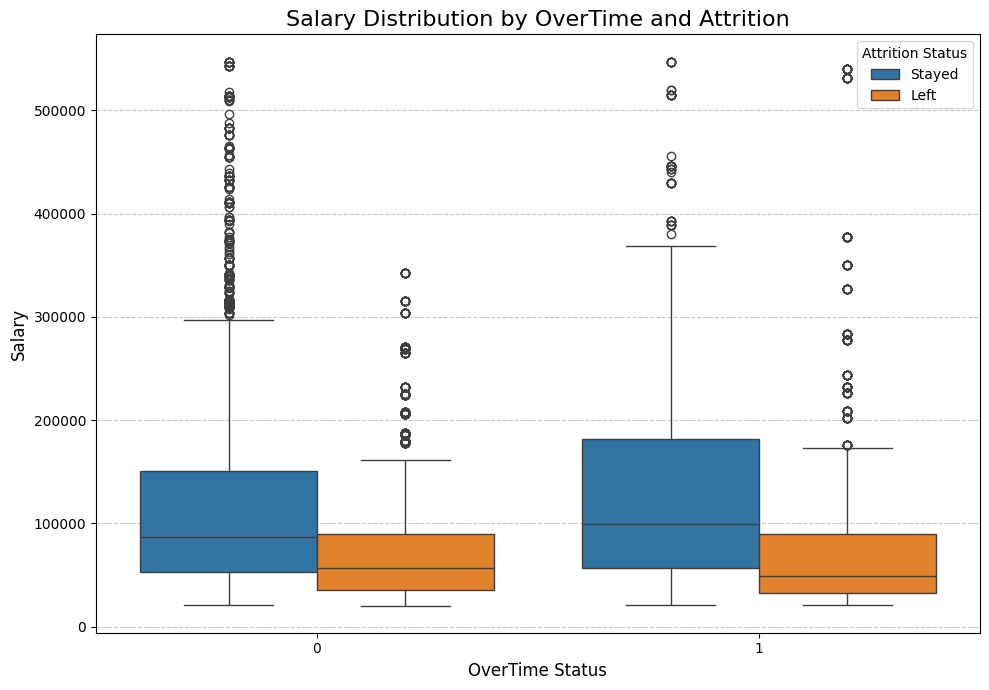

In [ ]:
# Assuming df_modeling is loaded and 'Attrition_Status' is mapped (Stayed/Left)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Attrition_Status' is defined for the hue
if 'Attrition_Status' not in df_modeling.columns:
    df_modeling['Attrition_Status'] = df_modeling['Attrition'].map({0: 'Stayed', 1: 'Left'})

# 1. Create the figure
plt.figure(figsize=(10, 7))

# 2. Create the Box Plot using the CORRECT column names
sns.boxplot(
    data=df_modeling,
    x='OverTime',
    y='Salary', # <--- The CORRECT column name for income
    hue='Attrition_Status',
    palette=['#1f77b4', '#ff7f0e']
)

# 3. Add labels and title
plt.title('Salary Distribution by OverTime and Attrition', fontsize=16)
plt.xlabel('OverTime Status', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(title='Attrition Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

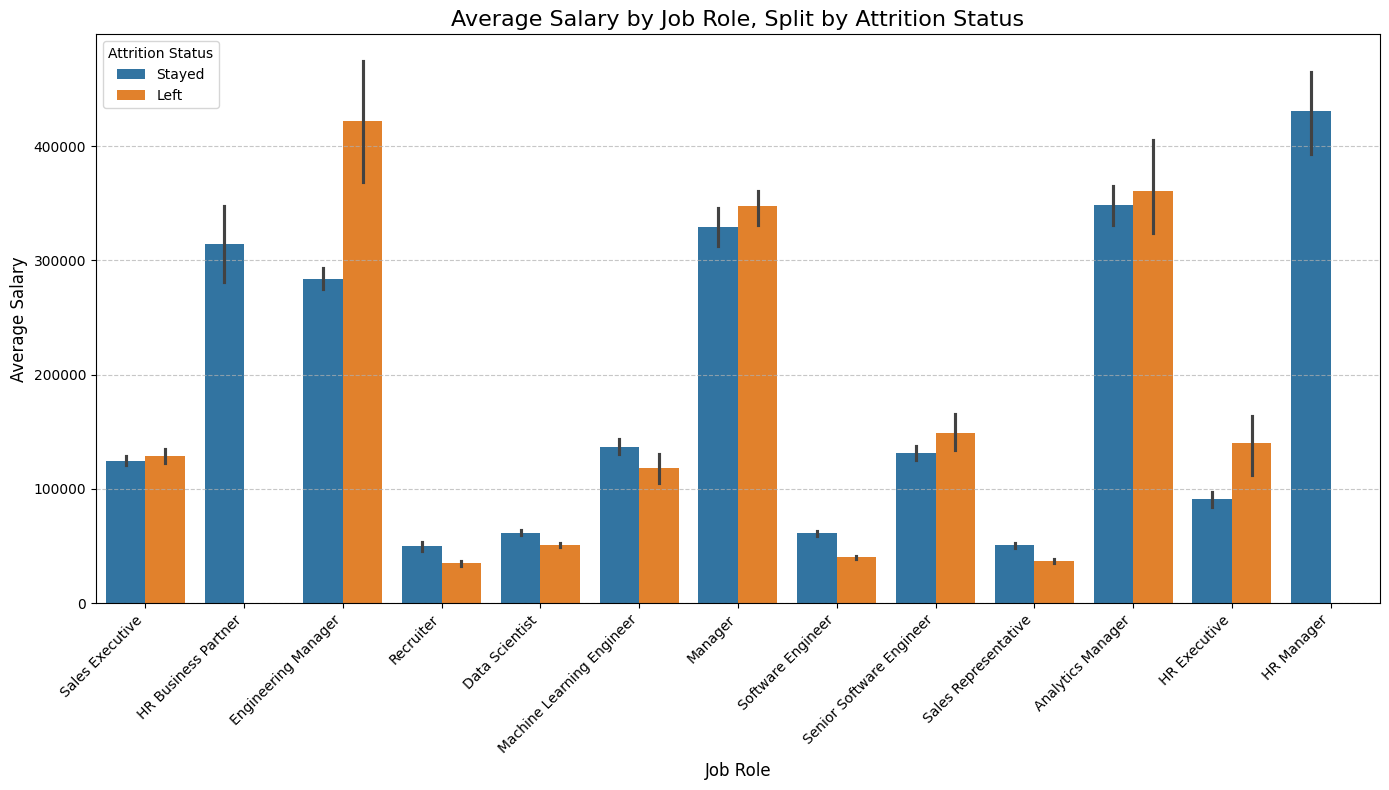

In [ ]:
# Ensure 'Attrition_Status' is defined for the hue
if 'Attrition_Status' not in df_modeling.columns:
    df_modeling['Attrition_Status'] = df_modeling['Attrition'].map({0: 'Stayed', 1: 'Left'})

# 1. Create the figure
plt.figure(figsize=(14, 8))

# 2. Create the Grouped Bar Chart
# Note: A bar chart of a continuous variable (Salary) calculates the MEAN automatically.
sns.barplot(
    data=df_modeling,
    x='JobRole',
    y='Salary',
    hue='Attrition_Status',
    palette=['#1f77b4', '#ff7f0e'] # Blue for stayed, Orange for left
)

# 3. Add labels and title
plt.title('Average Salary by Job Role, Split by Attrition Status', fontsize=16)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Attrition Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Attrition Analysis: Final Report Summary**

# **             Executive Summary**
The organization faces a critical retention crisis focused almost entirely on new hires and recent changes. The single most alarming finding is that employees with less than 2 years of tenure have an astronomical attrition rate of 80%, confirming that the firm is failing to establish commitment in its early workforce. Stability—whether in tenure, management, or promotion status—is the strongest predictor of retention. Interventions must be focused on the early employee lifecycle and addressing salary disparities, keeping in mind the difference between high-volume and high-risk roles.

**1. Core Demographics & Company Structure (Who is Leaving?)**

Departmental Risk: The Sales Department has the highest overall attrition rate at 40%, four times the company average.

Role-Specific Analysis: Risk vs. Volume: A distinction must be made between the risk of a role and its contribution to overall leavers:

Highest Risk/Volatility: The Sales Representative role is the single highest-risk job, with an attrition rate of 65%. This demands an urgent intervention to stabilize the role itself.

Highest Volume/Impact: Data Scientist (26.4%) and Sales Executive (24.0%) contribute the largest absolute volume of leavers to the company, meaning that even moderate improvements in retention here will have the greatest impact on total departures.

Business Travel: Frequent Travelers are highly volatile, showing a 50% attrition rate, compared to a 17% rate for those who do not travel.

Education Level Risk: Attrition rates are highest for employees with Bachelor's (Level 3) and Master's (Level 4) degrees, both showing a significant risk (around 35-37%). This highlights a major retention failure within the core professional workforce. Employees with a Doctorate (Level 5) show the lowest risk (approx. 22%), indicating stability among the most specialized staff.

**2. Tenure & Career Stability (When are they Leaving?)**

New Hire Crisis: Employees with less than 2 years of tenure have an 80% attrition rate. Conversely, employees with over 10 years of tenure show 0% attrition, proving long-term stability.

New Manager Volatility: Employees with a new manager (less than 1 year) are highly likely to leave (60% attrition), indicating critical issues in early manager-employee relationship building.

Promotion Disappointment: Employees who were promoted in the last year are the highest risk group (75% attrition) within this metric. This suggests promotions may be insufficient or timed poorly, making the employee more attractive to external recruiters.

Promotion Stability: Conversely, employees who have not been promoted in 5 or more years are very stable (approximately 7% attrition).

**3. Employee Sentiment & Environment (Internal Drivers)**

Job Satisfaction Paradox: Job Satisfaction is NOT a primary driver of attrition. Ratings from Level 2 through 5 show roughly the same high likelihood of leaving. Intriguingly, employees with the lowest satisfaction (Level 1) are slightly less likely to leave, suggesting these individuals are "stuck" for external reasons.

Relationship Quality: Low ratings for both Relationship Satisfaction and Manager Rating strongly correlate with higher attrition rates, confirming that poor direct relationships accelerate departures.

Work-Life Balance: Low Work-Life Balance ratings (Level 1 and 2) are associated with higher attrition, as expected.

**4. Work Conditions & Compensation (The Trade-Offs)**

Salary Disparity: The data confirms that, for a given tenure or job role, the average salary of Leavers is generally lower than the average salary of Stayers, confirming a salary disparity problem, particularly in the critical 0–2 year bracket.

OverTime Contradiction: Employees who are getting OverTime are paradoxically more likely to stay. This contradicts the general burnout hypothesis and strongly suggests that the additional salary/compensation for working overtime is acting as a protective factor.

Commute Risk: Attrition rates are highest at the extremes: Very Short Commutes (0-5 KM) often signaling low commitment, and Long Commutes (16+ KM) signaling burnout.

**Conclusion & Actionable Next Steps**

Dual Focus Strategy: Prioritize immediate stabilization for Sales Representatives (high risk) while simultaneously implementing strong retention bonuses/strategies for Data Scientists and Sales Executives (high volume).

Urgent New Hire Audit: Immediately investigate the onboarding, first-year compensation, and early management experience for all employees under two years of tenure.

Managerial Stability Training: Implement mandatory training for managers of new employees (0–1 year under a new boss) focused on relationship building and performance expectations to stabilize the 60% departure rate.